# Compte-rendu séance 01

## Objectifs

Les objectifs de cette UE sont dans la continuité de ce qui a été initié en Méthodologie Scientifique :

- Manipuler la programmation Python et la résolution de problème
- Apprendre les concepts de bases de la programmation :
    - briques élémentaires déjà rencontrées (variables, objets, affectation, boucles, conditionnelle, fonctions)
    - les structures plus_complexes_ : listes, tuples, dictionnaires, ensembles
    - les fichiers (et quelques modules qui permettent de les manipuler json, csv)
    - la programmation orientée objet
- Continuer à utiliser les différents outils : IDE pour taper un programme et l'exécuter, notebook jupyter pour expliquer et tester


## Retour sur un exercice

Nous reprenons l'exercice UpyLaB 3.7, l'exercice dit du _Casino_, qui se trouve dans la section 3.3. Rapide résumé de l'énoncé :

il s'agit de simuler le résultat d'un pari sur un jeu de roulette dont une image est donnée ci-dessous :

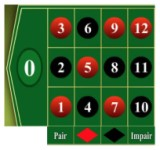

Le programme consiste donc à récupérer 2 entiers lus en entrée (`input`) : le premier est le pari du joueur qui sera soit un entier de la roulette (entre 0 et 12) soit un _code_ entier pour les autres possibilités de jeu :

- 13 pour dire que le joueur parie sur un nombre pair
- 14 pour dire que le joueur parie sur un nombre impair
- 15 pour dire que le joueur parie sur un rouge 
- 16 pour dire que le joueur parie sur un noir

La mise est de 10 et le programme doit afficher le gain qui sera de 12 fois la mise si le joueur parie sur le numéro sorti, 2 fois la mise s'il a parié sur la couleur sortie ou la bonne parité et 0 dans les autres cas. 

### Version 1

Nous réalisons une première version dans un EDI (Thonny), avec le bagage de ce qui aurait été vu au moment de réaliser cet exercice dans le mooc à savoir : les affectations, les types de base (entiers, booléens) et l'instruction conditionnelle.

Cette version est téléchargeable depuis le moodle du cours (fichier `casino.py`) et est reproduit ci-dessous :

In [ ]:
a = int(input()) 
b = int(input())
mise = 10

if a == b:
    gain = 12 * mise
elif a == 13 and b%2 == 0:
    gain = 2 * mise
elif a == 14 and b%2 != 0:
    gain = 2 * mise
elif a == 15 and (b == 1 or b == 3 or b == 5 or b == 7 or b == 9 or b == 12):
    gain = 2 * mise
elif a == 16 and (b == 2 or b == 4 or b == 6 or b == 8 or b == 10 or b == 11):
    gain = 2 * mise
else:
    gain = 0
print(gain)

#### Critique de la version 1

Le principal problème de ce code est sa lisibilité :

- les variables nommées `a` et `b` ne permettent pas d'identifier à quoi elles font références dans le problème. Il faudrait ajouter un commentaire ici pour dire que `a` correspond au pari du joueur et `b` au tirage de la roulette. Mais mieux encore : nommer correctement les variables
- utiliser des valeurs en _dur_ dans le code n'est pas une bonne chose ; ici les entiers 13, 14, 15 et 16 ont une signification bien particulière et il vaut mieux définir des constantes avec des noms explicites.

Tout ceci nous emmène à la version 2 :

### Version 2

In [ ]:
# CONSTANTES

PAIR = 13
IMPAIR = 14
ROUGE = 15
NOIR = 16

# Programme principal

pari = int(input()) 
tirage = int(input())
mise = 10

if pari == tirage:
    gain = 12 * mise
elif pari == PAIR and tirage%2 == 0:
    gain = 2 * mise
elif pari == IMPAIR and tirage%2 != 0:
    gain = 2 * mise
# ici comme il y a une parenthèse on peut passer à ligne pour réduire la longueur
elif pari == ROUGE and (tirage == 1 or tirage == 3 or tirage == 5 
                        or tirage == 7 or tirage == 9 or tirage == 12):   
    gain = 2 * mise
elif pari == NOIR and (tirage == 2 or tirage == 4 or tirage == 6 
                       or tirage == 8 or tirage == 10 or tirage == 11):
    gain = 2 * mise
else:
    gain = 0
print(gain)

## Version avec fonctions

Mais lorsqu'on modélise un problème il faut pouvoir décomposer un maximum. Ce qu'on aimerait c'est une fonction principale qui traduit cette vision du problème :

- Si le pari est égal au tirage alors le gain est 12 fois la mise
- sinon si la couleur du pari correspond à la couleur du tirage ou si la parité du pari correspond à la parité du tirage alors le gain est de 2 fois la mise
- sinon le gain est nul

Ce qui en python se traduit par cette fonction :

```python
def gain(pari, tirage, mise):
    if pari == tirage:
        _gain = 12 * mise
    elif bonne_couleur(pari, tirage) or bonne_parite(pari, tirage):
        _gain = 2 * mise
    else:
        _gain = 0
    return _gain
```

Et c'est ce qu'on va faire en définissant les fonctions `bonne_couleur` et `bonne_parite`, en utilisant des structures qui permettent de coder ces fonctions simplement, sans devoir tester une expression booléenne à rallonge. Voici le code complet :

In [6]:
# CONSTANTES

PAIR = 13
IMPAIR = 14
PARITE = PAIR, IMPAIR # version tuple...
# on peut aussi faire une version dictionnaire 
# PARITE = {0:PAIR, 1:IMPAIR}

ROUGE = 15
NOIR = 16
COULEURS = {ROUGE:(1, 3, 5, 7, 9, 12), NOIR:(2, 4, 6, 8, 10, 11)}

MISE_PAR_DEFAUT = 10

def bonne_couleur(pari, tirage):
    return pari in COULEURS and tirage in COULEURS[pari]

def bonne_parite(pari, tirage):
    return pari == PARITE[tirage%2]
            
def gain(pari, tirage, mise=MISE_PAR_DEFAUT):
    if pari == tirage:
        _gain = 12 * mise
    elif bonne_couleur(pari, tirage) or bonne_parite(pari, tirage):
        _gain = 2 * mise
    else:
        _gain = 0    
    return _gain

A ce stade, pas besoin de programme principal : on peut tester directement notre fonction `gain` :

In [8]:
gain(16, 4)

20

## Fichiers textes

Cette partie n'a pas été commencé avec le groupe Maths-Chimie. Nous y reviendrons à la prochaine séance. 

In [14]:
def lecture(filename):
    grille = []
    with open(filename, 'r', encoding='utf-8') as entree:
        for ligne in entree:
            

In [15]:
lecture('sudoku_01.txt')

4.3.96.1.

..28.1..3

.1......7

.4.7...26

5.7.1.4.9

12...3.8.

2......7.

7..2.98..

.6.15.3.2



à suivre, nous n'avons pas eu le temps d'aller plus loin sur la présentation de ce que nous allons voir dans cette UE au cours des semaines à venir.